### 导入相关库

In [1]:
import numpy as np
import os

### 利用自定义的数据生成器，加载预处理过后的.npy文件

In [11]:
from my_utils import DataGenerator

train_generator = DataGenerator(directory='np_data/train', batch_size=8)
val_generator = DataGenerator(directory='np_data/val', batch_size=8)

Found 141 files belonging to 2 classes.
     fight :  [1 0]
   nofight :  [0 1]
Found 60 files belonging to 2 classes.
     fight :  [1 0]
   nofight :  [0 1]


### 构建模型

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D

In [13]:
model = Sequential()
model.add(Conv3D(
    1, kernel_size=(3,3,3), strides=(1,1,1), kernel_initializer='he_normal', 
    input_shape=(16,112,112,3), activation='relu', padding='same'))
model.add(MaxPooling3D(pool_size=(1,2,2)))

model.add(Conv3D(
    1, kernel_size=(3,3,3), strides=(1,1,1), kernel_initializer='he_normal', activation='relu', padding='same'))
model.add(MaxPooling3D(pool_size=(4,4,4)))

model.add(Flatten())
model.add(Dense(16, activation='tanh'))
model.add(Dense(2, activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 16, 112, 112, 1)   82        
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 16, 56, 56, 1)     0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 16, 56, 56, 1)     28        
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 4, 14, 14, 1)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 34        
Total para

### 编译模型

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 训练模型

In [16]:
hist = model.fit_generator(train_generator, 
                           validation_data=val_generator,
                           verbose=2, 
                           epochs=10)

Epoch 1/10
 - 1s - loss: 0.6318 - acc: 0.6802 - val_loss: 0.5100 - val_acc: 0.7500
Epoch 2/10
 - 0s - loss: 0.4522 - acc: 0.8461 - val_loss: 0.4302 - val_acc: 0.9000
Epoch 3/10
 - 0s - loss: 0.4161 - acc: 0.8957 - val_loss: 0.3226 - val_acc: 0.9500
Epoch 4/10
 - 0s - loss: 0.3801 - acc: 0.8292 - val_loss: 0.3437 - val_acc: 0.8833
Epoch 5/10
 - 0s - loss: 0.2902 - acc: 0.9196 - val_loss: 0.2676 - val_acc: 0.9500
Epoch 6/10
 - 0s - loss: 0.2616 - acc: 0.9513 - val_loss: 0.3054 - val_acc: 0.9667
Epoch 7/10
 - 0s - loss: 0.2887 - acc: 0.9543 - val_loss: 0.3045 - val_acc: 0.9667
Epoch 8/10
 - 0s - loss: 0.2972 - acc: 0.9265 - val_loss: 0.2667 - val_acc: 0.9667
Epoch 9/10
 - 0s - loss: 0.2734 - acc: 0.9583 - val_loss: 0.2694 - val_acc: 0.9500
Epoch 10/10
 - 0s - loss: 0.2668 - acc: 0.9652 - val_loss: 0.4031 - val_acc: 0.7167


## 可视化指标

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

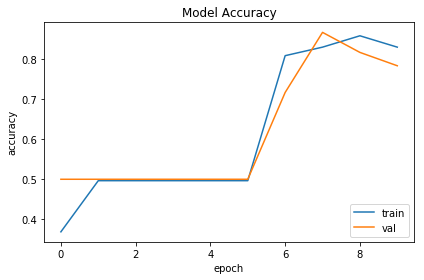

In [9]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.tight_layout()

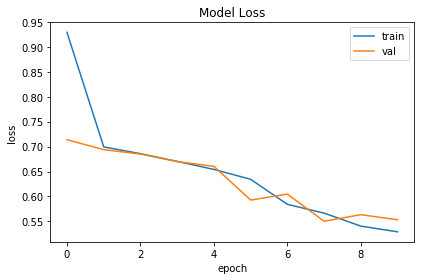

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()